# Homework 1


## exercise 1

Exercise 1. Consider the network in Figure 1 with link capacities
$c_2 = c_4 = c_6 = 1, c_1 = c_3 = c_5 = 2$.

In [1]:
from IPython.display import Image

Image(url="exercise1.png", width=300, height=300)

### exercise 1.1 
What is the minimum aggregate capacity that needs to be removed for no feasible flow from o to d to exist?

The minimal capacity that needs to be removed equals the capacity of the min-cut of the network

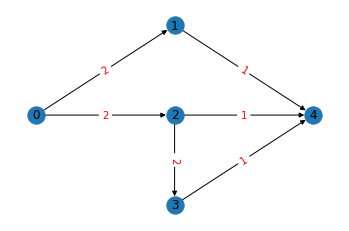

In [2]:
import networkx as nx

G = nx.DiGraph()
# o = 0, a = 1, b = 2, c = 3, d = 4

G.add_edges_from([(0,1),(0,2),(2,3),(3,4),(2,4),(1,4)])

#add position for clearer visualization
pos = {0:[-1,0], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,0]}

#draw the graph with special labels indicating the capacity of each edge
nx.draw_networkx_edge_labels(G,pos,edge_labels={
    (0,1):'2',(0,2):'2',(2,3):'2',
    (3,4):'1',(2,4):'1',(1,4):'1'},font_color='red')

nx.draw(G, pos, with_labels = True)

In [3]:
# insert manually the capacity of each edge
G[0][1]['capacity'] = 2
G[0][2]['capacity'] = 2
G[2][3]['capacity'] = 2
G[3][4]['capacity'] = 1
G[2][4]['capacity'] = 1
G[1][4]['capacity'] = 1

#apply min-cut algorithm to obtain the min-cut
nx.algorithms.flow.minimum_cut(G,0,4)

(3, ({0, 1, 2, 3}, {4}))

This shows that the minimum aggregate capacity that needs to be removed is 3 and one of the possible choices is to remove edges $e2, e4$ and $e6$  
The cut in this case corresponds to $U=\{o,a,b,c\},U^C=\{d\}$ -> $C_U = 3$

### exercise 1.2
what is the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from o to d?

From the previous result we already know that the min-cut is 3, and for the Max-flow Min-cut theorem we get that the max throughput of our network is 3. 
Using the algorithm provided by the networkx library we could check which is the flow vector, and from that vector we could see which are the edges from which we can remove the capacity 

In [4]:
#apply max-flow function to obtain the max-throughput of the graph
nx.algorithms.flow.maximum_flow(G,0,4)

(3, {0: {1: 1, 2: 2}, 1: {4: 1}, 2: {3: 1, 4: 1}, 3: {4: 1}, 4: {}})

To better understand the results here, we could create a simple table to show the flow vector f and the respective capacity vector c associated to the vector of edges $e$ = [$e_1$, $e_2$, $e_3$, $e_4$, $e_5$, $e_6$]


$$
 f = [1, 1, 2 , 1, 1, 1]
$$

$$
 c = [2, 1, 2, 1, 2, 1]
$$


Using as reference this table we could say that the max aggregate capacity that we could remove from the network without affecting the max throughput would be 2 (by adjusting the capacity on link $e_1$ and link $e_5$)

### exercise 1.3
You are given x > 0 extra units of capacity. How should you distribute them in order to
maximize the throughput that can be sent from o to d? Plot the maximum throughput from
o to d as a function of x ≥ 0.

Because of the max-flox min-cut theorem, the max throughput depends on the value of the minimum o-d cut. For this reason, our goal would be to maximize the min-cut of our network. The possible cuts of our network can be resumed in the following table 

- $U_1=\{o,a,b,c\},U_1^C=\{d\}$ -> $C_U = 3$
- $U_2=\{o,b,c\},U_2^C=\{c,d\}$ -> $C_U = 4$
- $U_3=\{o,a,c\},U_3^C=\{b,d\}$ -> $C_U = 4$
- $U_4=\{o,a,b\},U_4^C=\{a,d\}$ -> $C_U = 4$
- $U_5=\{o,c\},U_5^C=\{a,b,d\}$ -> $C_U = 5$
- $U_6=\{o,b\},U_6^C=\{a,c,d\}$ -> $C_U = 5$
- $U_7=\{o,a\},U_7^C=\{b,c,d\}$ -> $C_U = 3$
- $U_8=\{o\},U_8^C=\{a,b,c,d\}$ -> $C_U = 4$

An intuitive approach would be to add some capacity to certain edges so that we could increase the min cut
A possible approach could be done by the following code
Notice that the following code does not compute in the "best way" the cuts of the problem 

In [5]:
#the following code computes all the possible o-d cuts in G
from itertools import combinations

U = []

for L in range(1, G.number_of_nodes()): #L gives the number of element of each subset
    for subset in combinations(G.nodes, L): #subset is a candicate o-d cut with size L
        if int(0) in subset and int(4) not in subset: #check if node 'o' is in subset and node 'd' is not in subset
            U.append(list(subset)) 
            
U = U[::-1] #order the subsets in decreasing order
for u in U:
    print(u)

[0, 1, 2, 3]
[0, 2, 3]
[0, 1, 3]
[0, 1, 2]
[0, 3]
[0, 2]
[0, 1]
[0]


In [6]:
#The following code is used to compute the complementary set U_c given all the o-d cuts U
U_c = []
for subset in U: #for each o-d cut U
    base_set = list(G.nodes) #we obtain all the set of nodes 
    for el in subset: # for each element in the selected o-d cut
        base_set.remove(el) #we remove from the set of all nodes the o-d cut nodes
    print(base_set)
    U_c.append(base_set)

[4]
[1, 4]
[2, 4]
[3, 4]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
[1, 2, 3, 4]


In [7]:
# this function computes the capacity of each o-d cut 
def computecuts(G, U, U_c):
    iteration = 0 #used to make correspondence between the o-d cut U and it's complementary U_c
    cuts = []
    for subset in U: # for each subset in U
        cut = 0
        for el in subset: # for each node 'el' in the subset 
            adjs = list(G.adj[el]) #we retrieve all the adiacent nodes of the node 'el' 
            #print(list(G.adj[el]))
            for adj in adjs: # for each adjacent node 
                if adj in U_c[iteration]: # if the adjacent node is in the correspondent complementary set U_c ->
                    cut += G[el][adj]['capacity'] # update the capacity of the cut because 'el' is in U and 'adj' is in U_c
        iteration += 1 # update the iteration number because we have finished checking this U and we are going to the next
        cuts.append(cut) # append the cut in the result vector 
        #print(cut)
    return cuts

In [8]:
# this function is used to compute the most common used edge in all the possible cuts 
import numpy as np
from collections import Counter, OrderedDict
def find_edges(cuts, G, U, U_c):
    cuts = np.array(cuts) # transfor the array into numpy array to perform specific function 
    min_cuts = np.where(cuts == cuts.min())[0] # returns the indexes of the minimum capacity cuts we have in the numpy array
    min_cuts_index = min_cuts.tolist() #bring it back to list
    edges = []

    
    for i in min_cuts_index: # for each index in the list of indexes
        for el in U[i]: # for each node in the o-d with minimun capacity cut 
            adjs = list(G.adj[el]) # find all the adjacent nodes
            for adj in adjs: # for each adjacent node 
                if adj in U_c[i]: # check if the adjacent node is in the complementary cut U_c ->
                    edges.append((el,adj)) # add it to the list of edges 
    
    # we would like to find the most common used edge in all the minimum capacity cuts 
    dct = Counter(edges) # gives us a dictionary of {edge_number : n_times it appear}
    dct = OrderedDict(dct) # order it 
    return max(edges, key=dct.get) # return the one with max frequency of appearence

In [9]:
throughput = 8 # variable to modify to check the behaviour of the x value (extra_capacity)
y_list = []
x_list = []
x = 0 # variable to use for monitoring the extra capacity added to the graph
t = nx.algorithms.flow.minimum_cut(G,0,4)[0]
x_list.append(x)
y_list.append(t)
cuts = computecuts(G, U, U_c) #compute all the cuts 
while t < throughput: 
    node1,node2 = find_edges(cuts, G, U, U_c) #find the edge with max frequency in all the min capacity cuts 
    print('the nodes are '+ str(node1) +" "+ str(node2))
    G[node1][node2]["capacity"] += 1 #update its capacity
#     print(dict(G.edges))
    x += 1 #since we added an extra capacity, we increment this value
    cuts = computecuts(G, U, U_c) #compute all the cuts 
    print(cuts)
    t = nx.algorithms.flow.minimum_cut(G,0,4)[0] 
    x_list.append(x)
    y_list.append(t)
    print('the max throughput now is ' + str(t))
    #then we repeat the process again until the min-cut is equal to the throughput set at the start 

print(x_list)
print(y_list)


the nodes are 1 4
[4, 4, 5, 5, 5, 5, 4, 4]
the max throughput now is 4
the nodes are 1 4
[5, 4, 6, 6, 5, 5, 5, 4]
the max throughput now is 4
the nodes are 0 1
[5, 5, 6, 6, 6, 6, 5, 5]
the max throughput now is 5
the nodes are 1 4
[6, 5, 7, 7, 6, 6, 6, 5]
the max throughput now is 5
the nodes are 0 1
[6, 6, 7, 7, 7, 7, 6, 6]
the max throughput now is 6
the nodes are 1 4
[7, 6, 8, 8, 7, 7, 7, 6]
the max throughput now is 6
the nodes are 0 1
[7, 7, 8, 8, 8, 8, 7, 7]
the max throughput now is 7
the nodes are 1 4
[8, 7, 9, 9, 8, 8, 8, 7]
the max throughput now is 7
the nodes are 0 1
[8, 8, 9, 9, 9, 9, 8, 8]
the max throughput now is 8
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 4, 5, 5, 6, 6, 7, 7, 8]


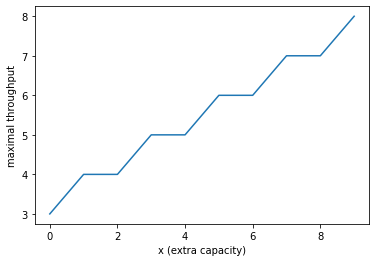

In [10]:
from matplotlib import pyplot as plt

plt.plot(x_list, y_list)
plt.xlabel('x (extra capacity)')
plt.ylabel('maximal throughput')
plt.savefig('exercise1_3.png')

In [11]:
plt.savefig('exercise1_3.png')
plt.show()

<Figure size 432x288 with 0 Axes>

## exercise 2


There are a set of people {p1, p2, p3, p4} and a set of books {b1, b2, b3, b4}. Each
person is interested in a subset of books, specifically

$$
    p_1 -> \{b_1,b_2\}, p_2 -> \{b_2,b_3\}, p_3 -> \{b_1,b_4\}, p_4 -> \{b_1,b_2,b_4\}
$$

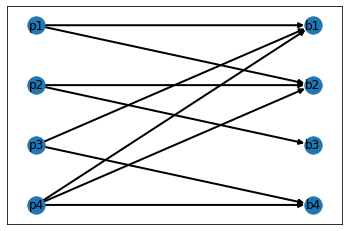

In [12]:
import networkx as nx 
from networkx.algorithms import bipartite
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

G = nx.DiGraph()

p = ['p1','p2','p3','p4']
b = ['b1','b2','b3','b4']

# G.add_nodes_from(['p1','p2','p3','p4'], bipartite=0)
# G.add_nodes_from(['b1','b2','b3'],bipartite=1)
# consider p1,p2,p3,p4 as 1,2,3,4 and b1,b2,b3,b4 as 5,6,7,8
G.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'),('p4','b1'),('p4','b2'),('p4','b4')])


#position to better visualize the graph
pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}

f = plt.figure()
nx.draw_networkx(G, pos, width = 2)
f.savefig("Exercise2.png", format="PNG")


### exercise 2.1

Exploit max-flow problems to find a perfect matching (if any).

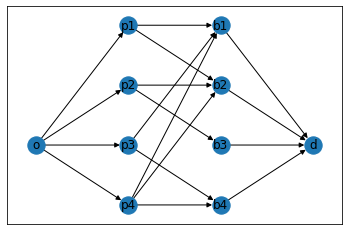

In [13]:
#we create the associated graph to perform the max-flow function
edges = []
for node in p:
    edges.append(('o',node)) #add edges 'o' - 'p' = {p1,p2,p3,p4}
for node in b:
    edges.append((node,'d')) #add edges 'b' = {b1,b2,b3,b4} - 'd'
    
G.add_edges_from(edges)
pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1], 'o':[-1,0], 'd':[2,0]}

f = plt.figure()
nx.draw_networkx(G, pos,with_labels=True)
f.savefig("Exercise2_1.png", format="PNG")

#to use the max flow function, we need to set the capacity
for (u,v) in G.edges:
    G[u][v]['capacity']=1

In [14]:
nx.algorithms.flow.maximum_flow(G,'o','d')

(4,
 {'p1': {'b1': 0, 'b2': 1},
  'b1': {'d': 1},
  'b2': {'d': 1},
  'p2': {'b2': 0, 'b3': 1},
  'b3': {'d': 1},
  'p3': {'b1': 1, 'b4': 0},
  'b4': {'d': 1},
  'p4': {'b1': 0, 'b2': 0, 'b4': 1},
  'o': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1},
  'd': {}})

### exercise 2.2

Assume now that there are multiple copies books, and the distribution of the number of
copies is (2, 3, 2, 2). Each person can take an arbitrary number of different books. Exploit
the analogy with max-flow problems to establish how many books of interest can be assigned
in total.


In [15]:
#since now we have the books, we need to update the capacities as described in the report 
n_books = [2,3,2,2]
for i,node in enumerate(b):
    G[node]['d']['capacity']=n_books[i] 
for i,node in enumerate(p):
    G['o'][node]['capacity']=sum(n_books)  #=sum(n_books) is a safe assumption (we know that the capacity won't be used 
                                           #  but without knowledge on the graph this is the best we can do)

#check the updated graph
dict(G.edges)

{('p1', 'b1'): {'capacity': 1},
 ('p1', 'b2'): {'capacity': 1},
 ('b1', 'd'): {'capacity': 2},
 ('b2', 'd'): {'capacity': 3},
 ('p2', 'b2'): {'capacity': 1},
 ('p2', 'b3'): {'capacity': 1},
 ('b3', 'd'): {'capacity': 2},
 ('p3', 'b1'): {'capacity': 1},
 ('p3', 'b4'): {'capacity': 1},
 ('b4', 'd'): {'capacity': 2},
 ('p4', 'b1'): {'capacity': 1},
 ('p4', 'b2'): {'capacity': 1},
 ('p4', 'b4'): {'capacity': 1},
 ('o', 'p1'): {'capacity': 9},
 ('o', 'p2'): {'capacity': 9},
 ('o', 'p3'): {'capacity': 9},
 ('o', 'p4'): {'capacity': 9}}

In [16]:
#perform the max-flow to check if there's perfect matching (from the result we would say no because books are 9, max flow is 8)
nx.algorithms.flow.maximum_flow(G,'o','d')

(8,
 {'p1': {'b1': 0, 'b2': 1},
  'b1': {'d': 2},
  'b2': {'d': 3},
  'p2': {'b2': 1, 'b3': 1},
  'b3': {'d': 1},
  'p3': {'b1': 1, 'b4': 1},
  'b4': {'d': 2},
  'p4': {'b1': 1, 'b2': 1, 'b4': 1},
  'o': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3},
  'd': {}})

### exercise 2.3
Suppose that the library can sell a copy of a book and buy a copy of another book. Which
books should be sold and bought to maximize the number of assigned books?


In [17]:
#let's compute all the feasible sol of removing one copy of a book and buy a copy of an another book
max_flow = nx.algorithms.flow.maximum_flow(G,'o','d')
#this max_flow is our starting point

removed_b = ''
added_b = ''
for (u,v) in G.edges:
    if v == 'd': # if the end-node is 'd'
#         print('remove from node ' + u)
        G1 = G # we create a copy of the original graph to do computation 
        G1[u][v]['capacity'] = G1[u][v]['capacity'] - 1 #subtract the capacity from the edge (u,v)
        for node in b: # for all the nodes in the book subset 
            if node != u: # assure that the book is not the one we have just sold
#                 print('add in node ' + node)
                G1[node][v]['capacity'] = G1[node][v]['capacity'] + 1 #increase capacity of the bought book
                flow = nx.algorithms.flow.maximum_flow(G,'o','d') # compute max-flow algorithm
                if flow > max_flow: #check if this is the max-flow
                    # if it is, then update...
                    max_flow = flow 
                    removed_b = u
                    added_b = node
                    print('best_found')
                    
print(f'removed one capacity from ({removed_b},d) and added one capacity to ({added_b},d) and the max flow is {max_flow}')
#requires some output handling but we can assure a perfect matching because max_flow = 9

best_found
removed one capacity from (b3,d) and added one capacity to (b1,d) and the max flow is (9, {'p1': {'b1': 1, 'b2': 1}, 'b1': {'d': 3}, 'b2': {'d': 3}, 'p2': {'b2': 1, 'b3': 1}, 'b3': {'d': 1}, 'p3': {'b1': 1, 'b4': 1}, 'b4': {'d': 2}, 'p4': {'b1': 1, 'b2': 1, 'b4': 1}, 'o': {'p1': 2, 'p2': 2, 'p3': 2, 'p4': 3}, 'd': {}})


## exercise3

We are given the highway network in Los Angeles, see Figure 2. 
To simplify the problem, an approximate highway map is given in Figure 3, covering part of the real highway
network. The node-link incidence matrix B, for this traffic network is given in the file traffic.mat.
The rows of B are associated with the nodes of the network and the columns of B with the links.
The i-th column of B has 1 in the row corresponding to the tail node of link $e_i$ and (−1) in the row
corresponding to the head node of link $e_i$
. Each node represents an intersection between highways
(and some of the area around).


Each link $e_i$ ∈ {$e_1$, . . . , $e_{28}$}, has a maximum flow capacity $c_ei$
. The capacities are given as
a vector $c_e$ in the file $capacities.mat$. Furthermore, each link has a minimum travelling time $l_ei$
,
which the drivers experience when the road is empty. In the same manner as for the capacities,
the minimum travelling times are given as a vector $l_e$ in the file $traveltime.mat$. These values are
simply retrieved by dividing the length of the highway segment with the assumed speed limit 60
miles/hour. For each link, we introduce the delay function

In [18]:
import scipy.io
import networkx as nx
import cvxpy as cp
import numpy as np

f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')["traffic"]
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

B.shape

# print(f)
# print(C)
# print(B)
# print(l)
l, C

(array([0.14583 , 0.044833, 0.129   , 0.18667 , 0.12983 , 0.078333,
        0.094   , 0.057333, 0.14167 , 0.10517 , 0.10667 , 0.10483 ,
        0.11233 , 0.1805  , 0.1215  , 0.080667, 0.075333, 0.056667,
        0.032667, 0.035   , 0.066667, 0.11283 , 0.078333, 0.054167,
        0.095833, 0.073   , 0.165   , 0.14867 ]),
 array([ 8741,  9864, 13350, 10926, 13707,  6960,  7422,  6678,  6297,
        11102,  8899,  8970,  9753,  9719,  9083,  7416, 13353, 11216,
        10947, 10019,  8732, 10763,  6677,  9403, 10355,  9067, 11990,
         8258], dtype=uint16))

### exercise 3.1

Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path
with shortest traveling time) in an empty network.


In [19]:
import numpy as np

n_edges = B.shape[1]

#set the inflow vector $nu$
nu = np.zeros(B.shape[0])
nu[0] = 1
nu[16] = -1

#formulate the problem of the shortest path 
f = cp.Variable(n_edges)
objective = cp.Minimize(l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

#print("Optimal f:", f.value)

#handling of the result because of scientific notation 
for i,value in enumerate(f.value):
    if value > 0.9:
        f.value[i] = 1
    else:
        f.value[i] = 0

print(f.value) 
edges = []

# recall that f is the flow vector which indicates what are the edges that have been used 
for i,value in enumerate(f.value):
    if value == 1:
        column = B[:,i] # for each column of the node-edge matrix B
        start = np.where(column == 1)[0] # starting node 
#         print('starting node : ' + str(start))
        end = np.where(column == -1)[0] # ending node 
#         print('ending node : ' + str(end))
        edges.append((start[0]+1,end[0]+1)) #update it because nodes in our visual starts from node1 to node17, in machine language from 0 to 16
        
print(f'the sequence of node is : {sorted(edges)}')


[1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
the sequence of node is : [(1, 2), (2, 3), (3, 9), (9, 13), (13, 17)]


### exercise 3.2 
Find the maximum flow between node 1 and 17

In [20]:
#construct the graph from node-edge matrix B and capacity vector C
edges = []
for i in range(n_edges): 
    column = B[:,i] # for the i-th column of the matrix  
    start = np.where(column == 1)[0] #extract tail node 
    end = np.where(column == -1)[0] #extract head node
    
    capacity = C[i] # for the i-th capacity 
    
    edges.append((start[0]+1,end[0]+1,{'capacity':capacity})) #add (tail, head)['capacity'] to the edges vector 

G = nx.DiGraph()
# create graph from the edges 
G.add_edges_from(edges)

#apply the max_flow algorithm
nx.algorithms.flow.maximum_flow(G,1,17)

(22448,
 {1: {2: 8741, 6: 13707},
  2: {3: 8741, 7: 0},
  3: {4: 0, 8: 0, 9: 8741},
  4: {5: 0, 9: 0},
  5: {14: 0},
  6: {7: 4624, 10: 9083},
  7: {8: 4624, 10: 0},
  8: {9: 4624, 11: 0},
  9: {13: 6297, 12: 7068},
  13: {14: 3835, 17: 10355},
  14: {17: 3835},
  10: {11: 825, 15: 8258},
  11: {12: 825, 15: 0},
  15: {16: 8258},
  12: {13: 7893},
  17: {},
  16: {17: 8258}})

### exercise 3.3 

Given the flow vector in $flow.mat$, compute the external inflow $ν$ satisfying $Bf = ν$

In [21]:
f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')["traffic"]
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

In [22]:
#simple multiplication for the inflow vector nu
res = B @ f
res

array([ 16806,   8570,  19448,   4957,   -746,   4768,    413,     -2,
        -5671,   1169,     -5,  -7131,   -380,  -7412,  -7810,  -3430,
       -23544], dtype=int32)

In [23]:
# check if it satisfies the constrain sum(inflow_vector) = 0
sum(res)

0

In [24]:
#set the new inflow vector for the next steps
nu = np.zeros(G.number_of_nodes())
nu[0] = res[0]
nu[-1] = -res[0]
nu

array([ 16806.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0., -16806.])

### exercise 3.4
Find the social optimum $f^*$ with respect to the delays on the different links $τ_e(f_e)$. For this,
minimize the cost function

In [25]:
l.T.shape, C.shape, n_edges, B.shape

((28,), (28,), 28, (17, 28))

In [26]:
def cost_funct_social_optimum(f, l, c, n_edges):
    cost_list = []
    for e in range(n_edges):
        cost = cp.multiply(cp.multiply(l[e],c[e]),cp.inv_pos(1 - f[e]/c[e])) - cp.multiply(l[e],c[e]) #cost function with cvxpy syntax
        cost_list.append(cost)
    cost_function = cp.sum(cost_list)
    return cost_function

In [27]:
# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cost_funct_social_optimum(f, l, C, n_edges))
constraints = [B @ f == nu, f >=0, f<= C]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
opt_flow = f.value
print("Social optimal flow:", np.around(opt_flow,1))
print("Optimal cost:", cost_opt)

Social optimal flow: [ 6642.2  6058.9  3132.3  3132.3 10163.8  4638.3  3006.3  2542.6  3131.5
   583.3     0.   2926.6     0.   3132.3  5525.5  2854.3  4886.4  2215.2
   463.7  2337.7  3318.   5655.7  2373.1     0.   6414.1  5505.4  4886.5
  4886.5]
Optimal cost: 25943.62261121288


### exercise 3.4 
Find the Wardrop equilibrium $f^{(0)}$. For this, use the cost function

In [28]:
# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cp.sum(-cp.multiply(cp.multiply(l,C),cp.log(1-f/C))))  #cost function with cvxpy syntax 
                                                                               #(explicit formulation in the report)
constraints = [B @ f == nu, f >=0, f <= C]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
wardrop_flow = f.value
print("Wardrop flow:", np.around(wardrop_flow,1))
print("Optimal cost:", cost_opt)


Wardrop flow: [ 6715.6  6715.6  2367.4  2367.4 10090.4  4645.4  2803.8  2283.6  3418.5
     0.    176.8  4171.4     0.   2367.4  5445.   2353.2  4933.3  1841.6
   697.1  3036.5  3050.3  6086.8  2586.5     0.   6918.7  4953.9  4933.3
  4933.3]
Optimal cost: 15729.607103430992


 Introduce tolls, such that the toll on link e is $ω_e$ = ${f^*_e}$$τ'_e$${(f^*_e)}$
is the flow at the system optimum. Now the delay on link e is given by $τ_e(f_e)$ + $ω_e$. compute the new Wardrop
equilibrium $f^w$
. What do you observe?

In [29]:
# calculate the toll (explicit formulation in the report )
toll = opt_flow*l/(C*(pow(1-opt_flow/C,2)))
toll

array([1.92210631e+00, 1.85064818e-01, 5.16694986e-02, 1.05176371e-01,
       1.44072968e+00, 4.69146428e-01, 1.07571171e-01, 5.69255527e-02,
       2.78803191e-01, 6.15501126e-03, 1.74005540e-07, 7.53489887e-02,
       2.18581142e-08, 1.26658219e-01, 4.81817175e-01, 8.20545054e-02,
       6.85716144e-02, 1.73792008e-02, 1.50892092e-03, 1.38933840e-02,
       6.58964442e-02, 2.63303327e-01, 6.70070611e-02, 1.14962944e-08,
       4.09840401e-01, 2.87273604e-01, 1.91578098e-01, 5.27755447e-01])

In [30]:
# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cp.sum(-cp.multiply(cp.multiply(l,C),cp.log(1-f/C)) + cp.multiply(toll,f))) #cost function with cvxpy syntax 
                                                                                          #(explicit formulation in the report)
constraints = [B @ f == nu, f >=0, f <= C]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
wardrop_flow_revised = f.value
print("Wardrop toll revised flow:", np.around(wardrop_flow_revised,1))
print(cost_opt)

Wardrop toll revised flow: [ 6643.   6059.1  3132.5  3132.5 10163.   4638.3  3006.3  2542.3  3131.5
   583.9     0.   2926.6     0.   3132.5  5524.8  2854.2  4886.4  2215.8
   464.   2337.5  3318.2  5655.7  2373.      0.   6414.1  5505.5  4886.4
  4886.4]
61885.75828419043


In [31]:
#check how close are the social optimal and the wardrop with tolls
res = (opt_flow - wardrop_flow_revised).tolist()
np.around(res,1)

array([-0.8, -0.1, -0.1, -0.1,  0.8,  0.1,  0. ,  0.3,  0.1, -0.6,  0. ,
       -0. ,  0. , -0.1,  0.7,  0. ,  0.1, -0.6, -0.3,  0.2, -0.2,  0. ,
        0.1,  0. , -0. , -0.1,  0.1,  0.1])

### exercise 3.5
Instead of the total travel time, let the cost for the system be the total additional delay
compared to the total delay in free flow, given by 
$$
    ψ_e(f_e) = f_e(τ_e(f_e)-l_e)
$$
subject to the flow constraints. Compute the system optimum $f^*$ for the costs above. Construct tolls $ω^*$ such that the Wardrop equilibrium $f^{(ω^*)}$ coincides with $f^*$. Compute the new Wardrop equilibrium with the constructed tolls $f^{(w^*)}$ to verify your result.


In [32]:
def cost_tot_social_optimum(f, l, c, n_edges):
    cost_list = []
    for e in range(n_edges):
        cost = cp.multiply(cp.multiply(l[e],c[e]),cp.inv_pos(1 - f[e]/c[e])) - cp.multiply(l[e],c[e]) - cp.multiply(f[e],l[e])
                                                                                        #cost function with cvxpy syntax 
                                                                                       #(explicit formulation in the report)
        cost_list.append(cost)
    cost_function = sum(cost_list)
    return cost_function

In [33]:
# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cost_tot_social_optimum(f, l, C, n_edges))
constraints = [B @ f == nu, f >=0, f <= C]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
opt_flow2 = f.value
print("tot Social optimal flow:", np.around(opt_flow2,1))

print("Optimal cost:", cost_opt)

tot Social optimal flow: [ 6653.3  5774.7  3419.7  3419.7 10152.7  4642.8  3105.8  2662.2  3009.1
   878.6     0.   2354.9     0.   3419.7  5509.9  3043.7  4881.8  2415.6
   443.7  2008.   3487.4  5495.4  2203.8     0.   6300.7  5623.5  4881.8
  4881.8]
Optimal cost: 15095.513524607864


In [34]:
# how similar are the social opt computed here and the previous social opt?
res = opt_flow2 - opt_flow
np.around(res,1)


array([  11.1, -284.3,  287.4,  287.4,  -11.1,    4.5,   99.5,  119.6,
       -122.5,  295.4,   -0. , -571.7,    0. ,  287.4,  -15.6,  189.4,
         -4.6,  200.3,  -20.1, -329.6,  169.4, -160.3, -169.3,    0. ,
       -113.4,  118.1,   -4.6,   -4.6])

In [35]:
# computation of the new toll (explicit formulation in the report)
tot_toll = opt_flow2*l/(C*(pow(1-opt_flow2/C,2))) 
tot_toll

array([1.94584065e+00, 1.52711415e-01, 5.97224754e-02, 1.23786840e-01,
       1.43018376e+00, 4.71408857e-01, 1.16314227e-01, 6.32036028e-02,
       2.48314780e-01, 9.81552302e-03, 8.89899134e-08, 5.06045729e-02,
       6.85184530e-08, 1.51183720e-01, 4.76284437e-01, 9.52456229e-02,
       6.84313634e-02, 1.98235455e-02, 1.43814506e-03, 1.09723284e-02,
       7.38053850e-02, 2.40509555e-01, 5.76040823e-02, 1.26928648e-08,
       3.80384889e-01, 3.13898622e-01, 1.91146067e-01, 5.25804606e-01])

In [36]:
# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cp.sum(-cp.multiply(cp.multiply(l,C),cp.log(C-f)-cp.log(C)) + cp.multiply(tot_toll,f) - cp.multiply(l,f))) 
                                                                        #cost function with cvxpy syntax 
                                                                        #(explicit formulation in the report)
constraints = [B @ f == nu, f >=0, f <= C]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
wardrop_tot_flow_toll = f.value
print("Wardrop flow tot toll:", np.around(wardrop_tot_flow_toll,1))
print("Optimal cost:", cost_opt)

Wardrop flow tot toll: [ 6653.1  5775.4  3419.5  3419.5 10152.9  4642.4  3105.5  2661.7  3009.2
   877.7     0.   2355.9     0.   3419.5  5510.4  3043.4  4881.7  2414.6
   443.8  2008.5  3487.1  5495.6  2204.1     0.   6300.7  5623.5  4881.7
  4881.7]
Optimal cost: 50795.96071700545


In [37]:
# compute how similar are the new social opt and the new wardrop with tolls 
np.around(opt_flow2 - wardrop_tot_flow_toll,1)

array([ 0.2, -0.8,  0.2,  0.2, -0.2,  0.4,  0.3,  0.5, -0.1,  0.9,  0. ,
       -1. ,  0. ,  0.2, -0.5,  0.3,  0.1,  0.9, -0.1, -0.5,  0.2, -0.2,
       -0.3,  0. , -0. , -0.1,  0.1,  0.1])